# 线性回归

线性回归是一种十分基础的机器学习算法。但是基础并不意味着不重要，相反，基础往往才是最重要的。

在统计学中，线性回归（英语：linear regression）是利用称为线性回归方程的最小平方函数对一个或多个自变量和因变量之间关系进行建模的一种回归分析。这种函数是一个或多个称为回归系数的模型参数的线性组合。只有一个自变量的情况称为简单回归，大于一个自变量情况的叫做多元回归（multivariable linear regression)。

在线性回归中，数据使用线性预测函数来建模，并且未知的模型参数也是通过数据来估计。这些模型被叫做线性模型。最常用的线性回归建模是给定 $\mathrm{X}$ 值的 $y$ 的条件均值是 $\mathrm{X}$ 的仿射函数。不太一般的情况，线性回归模型可以是一个中位数或一些其他的给定 $\mathrm{X}$ 的条件下 $y$ 的条件分布的分位数作为X的线性函数表示。像所有形式的回归分析一样，线性回归也把焦点放在给定 $\mathrm{X}$ 值的y的条件概率分布，而不是 $\mathrm{X}$ 和 $y$ 的联合概率分布（多元分析领域）。

线性回归是回归分析中第一种经过严格研究并在实际应用中广泛使用的类型。这是因为线性依赖于其未知参数的模型比非线性依赖于其未知参数的模型更容易拟合，而且产生的估计的统计特性也更容易确定。

线性回归有很多实际用途。分为以下两大类：

- 如果目标是预测或者映射，线性回归可以用来对观测数据集X的值拟合出一个预测模型。当完成这样一个模型以后，对于一个新增的 $\mathrm{X}$ 值，在没有给定与它相配对的 $y$ 的情况下，可以用这个拟合过的模型预测出一个 $y$ 值。

- 给定一个变量 $y$ 和一些变量 $x_1,...,x_p$，这些变量有可能与 $y$ 相关，线性回归分析可以用来量化 $y$ 与 $x_j$ 之间相关性的强度，评估出与 $y$ 不相关的 $x_j$，并识别出哪些 $x_j$ 的子集包含了关于 $y$ 的冗余信息。【维基百科】

对于一个线性回归问题，一般来讲有 2 种解决方法，分别是：最小二乘法和梯度下降法。其中最小二乘法又分为两种求解思路：代数求解和矩阵求解。

## 最小二乘代数求解

最小二乘法是线性回归问题最常用的解决方法。我们这里使用到的是普通最小二乘法，英文为：Ordinary Least Squares，简称 OLS。最小二乘法中的「二乘」代表平方，最小二乘也就是最小平方。而这里的平方就是指代平方损失函数。

假设我们需要求解的是一元线性回归问题，及其对应的线性方程如下：

$$y(x, \omega) = \omega_0 + \omega_1 x$$

首先要定义平方损失函数：

$$J(\omega) = \sum_{i=1}^n\big(y_i - (\omega_0 + \omega_1 x_i)\big)^2$$

最小二乘的目标是就是求平方误差最小时候的$\omega$。求最小值就是求偏导数：

$$
\begin{array}{c}
\frac{\partial J(\omega)}{\partial w_{0}}=-2\left(\sum_{i=1}^{n} y_{i}-n w_{0}-w_{1} \sum_{i=1}^{n} x_{i}\right) \\
\frac{\partial J(\omega)}{\partial w_{1}}=-2\left(\sum_{i=1}^{n} x_{i} y_{i}-w_{0} \sum_{i=1}^{n} x_{i}-w_{1} \sum_{i=1}^{n} x_{i}^{2}\right)
\end{array}
$$

然后，我们令 $\frac{\partial J(\omega)}{\partial w_{0}}=0$ 以及 $\frac{\partial J(\omega)}{\partial w_{1}}=0$ 解得：

$$
n \omega_0 + \sum_{i = 1}^n x_i \omega_1 = \sum_{i = 1}^n y_i 
$$

$$
\sum_{i = 1}^n x_i \omega_0 + \sum_{i = 1}^n x_i^2 \omega_1 = \sum_{i = 1}^n x_i y_i
$$


二元一次方程组，根据克莱姆法则解得$\omega_0$和$\omega_1$为：

$$
\hat\omega_1 = \frac {n \sum\limits_{i = 1}^n x_i y_i - \sum\limits_{i = 1}^n x_i \sum\limits_{i = 1}^n y_i} {n \sum\limits_{i = 1}^n x_i^2 - \left(\sum\limits_{i = 1}^n x_i\right)^2}
=\frac{\sum\limits_{i = 1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i = 1}^n(x_i-\bar{x})^2}
$$

$$
\hat\omega_0 = \frac {\sum\limits_{i = 1}^n x_i^2 \sum\limits_{i = 1}^n y_i - \sum\limits_{i = 1}^n x_i \sum\limits_{i = 1}^n x_iy_i} {n \sum\limits_{i = 1}^n x_i^2 - \left(\sum\limits_{i = 1}^n x_i\right)^2}= \bar y-\bar x \hat\omega_1
$$

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def olsm_algebra(x, y):
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    w = np.dot((x - x.mean()).T, y - y.mean()) / np.dot((x - x.mean()).T, x - x.mean())
    b = y.mean() - x.mean() * w
    
    return b, w

In [37]:
x = np.array([55, 71, 68, 87, 101, 87, 75, 78, 93, 73])
y = np.array([91, 101, 87, 109, 129, 98, 95, 101, 104, 93])

In [38]:
b, w = olsm_algebra(x, y)
print(b, w)

[[44.25604341]] [[0.7175629]]


那么，所对应的线性方程为：$y =  44.256 + 0.718x$。

In [39]:
def predict(x, b, w):
    x = x.reshape(-1,1)
    return b + x.dot(w)

In [40]:
def plot(x, y, b, w, color = 'r'):
    pred_Xs = np.array([[np.min(x)*0.9], [np.max(x)*1.1]])
    pred_Ys = predict(pred_Xs, b, w)
    plt.plot(pred_Xs[:,0], pred_Ys, color=color)
    plt.scatter(x,y)

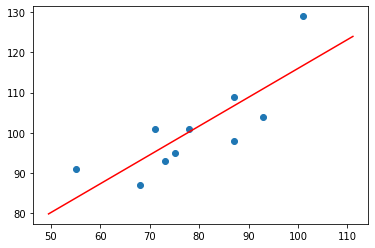

In [42]:
plot(x, y, b, w)

## 最小二乘法矩阵求解

根据一元线性函数的表达式 $f(x, \omega) = \omega_0 + \omega_1x$。那么，转换成矩阵形式为：

$$
\left[\begin{array}{c}
1, x_{1} \\
1, x_{2} \\
\cdots \\
1, x_{n-1} \\
1, x_{n}
\end{array}\right] *\left[\begin{array}{c}
w_{0} \\
w_{1}
\end{array}\right]=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\cdots \\
y_{n-1} \\
y_{n}
\end{array}\right]
$$

一般形式：$$f(x,\omega) = XW$$

然后，平方损失函数转换为矩阵形式：

$$
J(\omega)=\sum_{i=1}^{n}\left(y_{i}-\left(w_{0}+w_{1} x_{i}\right)\right)^{2}=(y-X W)^{T}(y-X W)
$$

$$
\frac{\partial J(\omega)}{\partial W}=2 * X^{T} X W-2 * X^{T} y=0
$$

$$
W=\left(X^{T} X\right)^{-1} X^{T} y
$$

对于多元线性回归，矩阵$X$将变成：

$$
X = \left[\begin{array}{ccccc}
1 &  x_1^{(1)} &  x_1^{(2)} & \cdots & x_1^{(n)}\\
1 &  x_2^{(1)} &  x_2^{(2)} & \cdots & x_2^{(n)} \\
1 &  x_3^{(1)} &  x_3^{(2)} & \cdots & x_3^{(n)} \\
\vdots & \vdots & \vdots & \ddots & \cdots \\
1 &  x_n^{(1)} &  x_n^{(2)} & \cdots &  x_n^{(n)}
\end{array}\right]
$$

***
注意：上式中，下标表示样本编号，上标表示特征编号！
***

In [8]:
def olsm_matrix(x, y):
    x , y = np.array(x), np.array(y)
    X = np.c_[np.ones((len(x),1)),x]
    A = np.matmul(X.T, X)
    Xb = np.matmul(X.T, y)
    W = np.matmul(np.linalg.inv(A), Xb)
    b = W[0].reshape(-1,1)
    w = W[1:].reshape(-1, 1)
    return b, w

In [9]:
def get_loss(x, y, b, w):
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    y_hat = predict(x, b, w)
    loss = np.sum((y - y_hat)**2)
    return loss

In [10]:
b, w = olsm_matrix(x,y)
print(b,w)

[[44.25604341]] [[0.7175629]]


In [11]:
loss = get_loss(x, y, b, w)
print(loss)

426.6438085841144


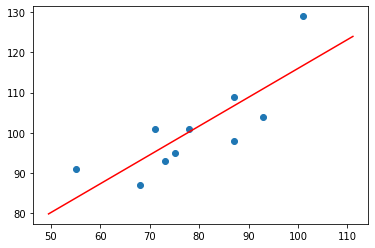

In [12]:
plot(x, y, b, w)

## 梯度下降法

梯度下降法作为迭代优化方法，需要提前定义好损失函数。这里选择均方误差 MSE 作为损失函数。

$$
J=\frac{1}{2} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$


其中，$y_{i}$  表示真实值，$\hat y_{i}$ 表示近似值，$n$ 则表示值的个数。近似值则通过当前已知计算，那么：

$$
J(\omega) = \frac{1}{2} \sum_{i=1}^{m} \big(y_i-f(x_i,\omega)\big)^2
$$

求解参数和截距项对应的梯度：

$$
\begin{aligned}
\frac{\partial J(\omega)}{\partial w_{0}} &= \sum_{i=1}^{n}\left(f(x_i,\omega) - y_{i}\right)\\
\frac{\partial J(\omega)}{\partial w_{j}} &= \sum_{i=1}^{n}\left(f(x_i,\omega) - y_{i}\right)*x_i^{(j)}
\end{aligned}
$$

那么，根据梯度就可以执行迭代更新，从而找到最优参数：

$$
\begin{array}{l}
w_{0}=w_{0} - \alpha * \frac{\partial J(\omega)}{\partial w_{0}} \\
w_{j}=w_{j} - \alpha * \frac{\partial J(\omega)}{\partial w_{j}}
\end{array}
$$

In [13]:
def gradient_descent(x, y, learning_rate = 0.0001, iterations = 200, W=None):
    Xs = np.c_[np.ones((len(x),1)), x]
    Ys = y.reshape((Xs.shape[0], 1))
    
    if W is None:
        W = np.zeros((Xs.shape[1], 1))
    #w = np.array([[44], [0.8]])
    loss = []

    for i in range(iterations):
        errors = Ys - Xs.dot(W)
        loss.append(np.sum(errors**2))
        grad = -(Xs.T).dot(errors)
        W = W - learning_rate * grad
        print("\nEpoch: {:d} loss: {:.4f} ".format(i+1, loss[-1]), end='')
    print()
    plt.plot(loss)
    b = W[0].reshape(-1,1)
    w = W[1:].reshape(-1, 1)
    return b, w


Epoch: 1 loss: 102868.0000 
Epoch: 2 loss: 14338.6712 
Epoch: 3 loss: 2689.7893 
Epoch: 4 loss: 1157.0021 
Epoch: 5 loss: 955.3125 
Epoch: 6 loss: 928.7715 
Epoch: 7 loss: 925.2770 
Epoch: 8 loss: 924.8150 
Epoch: 9 loss: 924.7520 
Epoch: 10 loss: 924.7415 
Epoch: 11 loss: 924.7379 
Epoch: 12 loss: 924.7352 
Epoch: 13 loss: 924.7327 
Epoch: 14 loss: 924.7302 
Epoch: 15 loss: 924.7276 
Epoch: 16 loss: 924.7251 
Epoch: 17 loss: 924.7225 
Epoch: 18 loss: 924.7200 
Epoch: 19 loss: 924.7175 
Epoch: 20 loss: 924.7149 

w = (array([[0.0178926]]), array([[1.26467512]]))


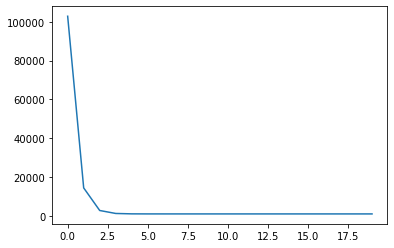

In [14]:
b1, w1 = gradient_descent(x, y, learning_rate = 0.00001, iterations = 20)
print(f"\nw = {b1, w1}")


Epoch: 1 loss: 3796.0000 
Epoch: 2 loss: 873.9997 
Epoch: 3 loss: 489.5166 
Epoch: 4 loss: 438.9255 
Epoch: 5 loss: 432.2686 
Epoch: 6 loss: 431.3926 
Epoch: 7 loss: 431.2774 
Epoch: 8 loss: 431.2622 
Epoch: 9 loss: 431.2601 
Epoch: 10 loss: 431.2599 
Epoch: 11 loss: 431.2598 
Epoch: 12 loss: 431.2598 
Epoch: 13 loss: 431.2598 
Epoch: 14 loss: 431.2597 
Epoch: 15 loss: 431.2597 
Epoch: 16 loss: 431.2597 
Epoch: 17 loss: 431.2597 
Epoch: 18 loss: 431.2596 
Epoch: 19 loss: 431.2596 
Epoch: 20 loss: 431.2596 

w = (array([[39.99737513]]), array([[0.77023168]]))


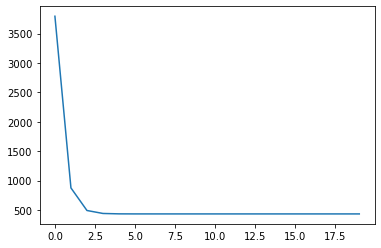

In [15]:
b2, w2 = gradient_descent(x, y, learning_rate = 0.00001, iterations = 20, W=np.array([[40],[1]]))
print(f"\nw = {b2, w2}")

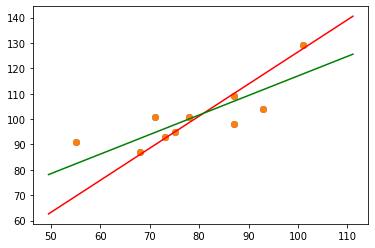

In [16]:
plot(x,y,b1, w1, 'r')
plot(x,y,b2, w2, 'g')

## 数据规范化

在回归问题和一些机器学习算法中，以及训练神经网络的过程中，通常需要对原始数据进行中心化（Zero-centered或者Mean-subtraction）处理和标准化（Standardization或Normalization）处理。

通过中心化和标准化处理，得到均值为0，标准差为1的服从标准正态分布的数据。计算过程由下式表示：
$$x^{'}=\frac{x-\mu }{\sigma }$$

在一些实际问题中，我们得到的样本数据都是多个维度的，即一个样本是用多个特征来表征的。比如在预测房价的问题中，影响房价$y$的因素有房子面积$x_{1}$、卧室数量$x_{2}$等，我们得到的样本数据就是$(x_{1},x_{2})$这样一些样本点，这里的$x_{1}、x_{2}$又被称为特征。很显然，这些特征的量纲和数值得量级都是不一样的，在预测房价时，如果直接使用原始的数据值，那么他们对房价的影响程度将是不一样的，而通过标准化处理，可以使得不同的特征具有相同的尺度（Scale）。这样，在使用梯度下降法学习参数的时候，不同特征对参数的影响程度就一样了。

其实，在不同的问题中，中心化和标准化有着不同的意义，比如在训练神经网络的过程中，通过将数据标准化，能够加速权重参数的收敛。
另外，对于主成分分析（PCA）问题，也需要对数据进行中心化和标准化等预处理步骤。

In [17]:
ux = x.mean()
sx = x.std()
uy = y.mean()
sy = y.std()
x1 = (x - ux) / sx
y1 = (y - uy) / sy



Epoch: 1 loss: 10.0000 
Epoch: 2 loss: 8.7425 
Epoch: 3 loss: 7.7240 
Epoch: 4 loss: 6.8990 
Epoch: 5 loss: 6.2307 
Epoch: 6 loss: 5.6894 
Epoch: 7 loss: 5.2510 
Epoch: 8 loss: 4.8958 
Epoch: 9 loss: 4.6081 
Epoch: 10 loss: 4.3751 
Epoch: 11 loss: 4.1864 
Epoch: 12 loss: 4.0335 
Epoch: 13 loss: 3.9097 
Epoch: 14 loss: 3.8094 
Epoch: 15 loss: 3.7281 
Epoch: 16 loss: 3.6623 
Epoch: 17 loss: 3.6090 
Epoch: 18 loss: 3.5658 
Epoch: 19 loss: 3.5309 
Epoch: 20 loss: 3.5025 
Epoch: 21 loss: 3.4796 
Epoch: 22 loss: 3.4610 
Epoch: 23 loss: 3.4459 
Epoch: 24 loss: 3.4338 
Epoch: 25 loss: 3.4239 
Epoch: 26 loss: 3.4159 
Epoch: 27 loss: 3.4094 
Epoch: 28 loss: 3.4041 
Epoch: 29 loss: 3.3999 
Epoch: 30 loss: 3.3965 

w = (array([[1.11022302e-16]]), array([[0.77903891]]))


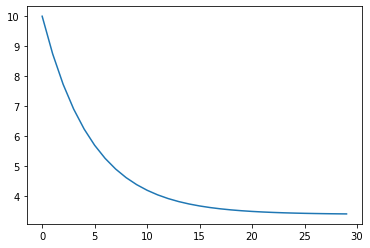

In [18]:
b3, w3 = gradient_descent(x1, y1, learning_rate = 0.01, iterations = 30)
print(f"\nw = {b3, w3}")

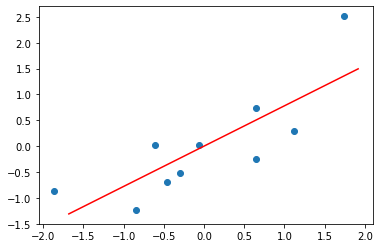

In [19]:
plot(x1, y1, b3, w3)

In [20]:
w4 = w3 * sx / sy
b4 = b3 * sy - ux / sx * sy + uy

In [21]:
w4, b4

(array([[0.88322261]]), array([[31.29513729]]))

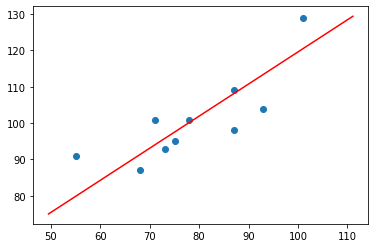

In [22]:
plot(x, y, b4, w4)

可以用sklearn库来实现数据规范化。

In [23]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x1 = scaler_x.fit_transform(x.reshape(-1,1))
y1 = scaler_y.fit_transform(y.reshape(-1,1))


Epoch: 1 loss: 10.0000 
Epoch: 2 loss: 8.7425 
Epoch: 3 loss: 7.7240 
Epoch: 4 loss: 6.8990 
Epoch: 5 loss: 6.2307 
Epoch: 6 loss: 5.6894 
Epoch: 7 loss: 5.2510 
Epoch: 8 loss: 4.8958 
Epoch: 9 loss: 4.6081 
Epoch: 10 loss: 4.3751 
Epoch: 11 loss: 4.1864 
Epoch: 12 loss: 4.0335 
Epoch: 13 loss: 3.9097 
Epoch: 14 loss: 3.8094 
Epoch: 15 loss: 3.7281 
Epoch: 16 loss: 3.6623 
Epoch: 17 loss: 3.6090 
Epoch: 18 loss: 3.5658 
Epoch: 19 loss: 3.5309 
Epoch: 20 loss: 3.5025 
Epoch: 21 loss: 3.4796 
Epoch: 22 loss: 3.4610 
Epoch: 23 loss: 3.4459 
Epoch: 24 loss: 3.4338 
Epoch: 25 loss: 3.4239 
Epoch: 26 loss: 3.4159 
Epoch: 27 loss: 3.4094 
Epoch: 28 loss: 3.4041 
Epoch: 29 loss: 3.3999 
Epoch: 30 loss: 3.3965 

w = (array([[1.11022302e-16]]), array([[0.77903891]]))


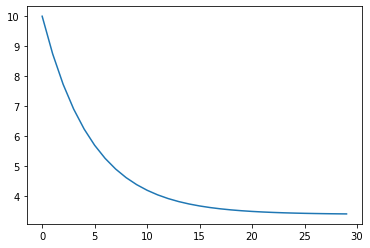

In [24]:
b5, w5 = gradient_descent(x1, y1, learning_rate = 0.01, iterations = 30)
print(f"\nw = {b5, w5}")

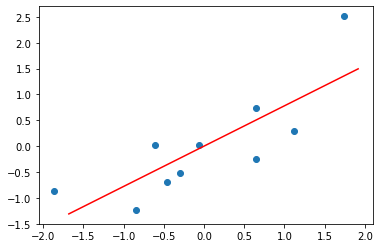

In [25]:
plot(x1, y1, b5, w5)

回归系数还原

$$y' = b' + \omega'_1 x'_1 + \omega'_2 x'_2 + \cdots + \omega'_m x'_m $$


$$\frac{y - \mu _y}{\sigma_y} = b' + \omega'_1 \frac{x_1 - \mu _1}{\sigma_1} + \omega'_2 \frac{x_2 - \mu _2}{\sigma_2}  + \cdots + \omega'_m \frac{x_n - \mu _n}{\sigma_n} $$

所以，
$$
y = b'\sigma_y + \mu _y - \sigma_y  \big( \frac{\omega'_1 \mu_1 } {\sigma_1}  + \frac{\omega'_3 \mu_2}{\sigma_2} + \cdots + \frac{\omega'_m \mu_m } {\sigma_m} \big ) + \sigma_y \frac{\omega'_1}{\sigma_1} x_1 + \sigma_y \frac{\omega'_2}{\sigma_2} x_2 +\cdots +  \sigma_y \frac{\omega'_m}{\sigma_m} x_m
$$

$$
\omega_j = \sigma_y\frac{\omega'_j } {\sigma_j} 
$$

$$
b = b'\sigma_y + \mu _y - \sigma_y \omega ^{T}\mu
$$

In [26]:
w6 = w5 / scaler_x.scale_ * scaler_y.scale_[0]
b6 = b5 * scaler_y.scale_ - np.dot(w6, scaler_x.mean_) + scaler_y.mean_

In [27]:
w6, b6

(array([[0.68714458]]), array([[46.65300723]]))

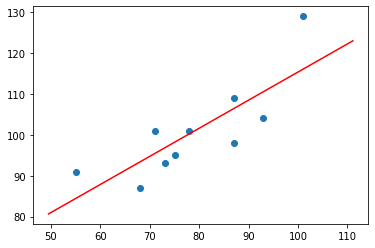

In [28]:
plot(x, y, b6, w6)

## sklearn regression

LinearRegression回归模型在Sklearn.linear_model子类下，调用sklearn逻辑回归算法步骤比较简单，即：

- 导入模型。调用逻辑回归LogisticRegression()函数。

- fit()训练。调用fit(x,y)的方法来训练模型，其中 x 为数据的属性，y 为所属类型。

- predict()预测。利用训练得到的模型对数据集进行预测，返回预测结果。

```python 
LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
```

参数详解：

- fit_intercept：默认True，是否计算模型的截距，为False时，则数据中心化处理
- normalize：默认False，是否中心化，或者使用sklearn.preprocessing.StandardScaler()
- copy_X：默认True，否则X会被改写
- n_jobs：默认为1，表示使用CPU的个数。当-1时，代表使用全部CPU

调用方法：

- coef_：训练后的输入端模型系数，如果 label 有两个，即 y 值有两列。那么是一个 2D 的 array
- intercept_：截距
- predict(x)：预测数据
- score：评估

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x_train = x.reshape(-1,1)
y_train = y.reshape(-1,1)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
print(lr.intercept_, lr.coef_)

[44.25604341] [[0.7175629]]


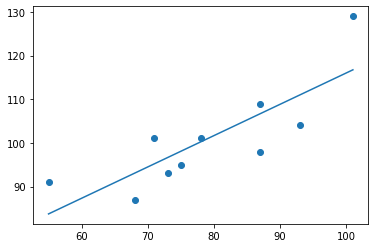

In [31]:
pred_x = np.array([[x.min()], [x.max()]])
pred_y = lr.predict(pred_x)
plt.scatter(x, y)
plt.plot(pred_x, pred_y)

## 回归评价

在机器学习中，在讨论模型的性能时，要追求模型性能，也要兼顾模型的泛化指标，尽量避免让模型陷入过拟合陷阱。也就是说一个好的模型，不仅要在训练集合上有好的表现，在新样本（或测试集）上也有上佳的表现才行。

判断过拟合的一个简单方法就是，在同一种性能标准下，训练集合的误差显著小于在测试集合上的误差。

自然，可以利用均方根误差（Root Mean Squared Error，简称RMSE）来衡量模型的好坏，但用它来衡量模型对数据的拟合程度，是有较大的缺陷。这是因为，RMSE容易受到因变量（目标）和自变量（特征）量纲大小的影响，比如说，A模型中的因变量的数量级都是诸如1000、2000…这样的数值，而B模型中因变量都是1、2…这样数量级的值。很显然，相对于模型B，A模型中RMSE很可能会比较大，但这不能说明A模型的泛化能力就比第B模型差。

解决上述问题的办法，除了可以做归一化处理之外，还可以用决定系数（coefficient of determination）来刻画。

### 决定系数

假设一数据集包括$y_1, \cdots, y_n$共 $n$ 个观察值，拟合而来的模型给出的预测值分别为 $\hat{y}_1, \cdots, \hat{y}_n$。

那么，平均观察值可定义为:
$$
\bar{y} = \frac{1}{n} \sum\limits_{i=1}^{n}y_i
$$
总体离差平方和(Sum of Squares for total，亦简称SST)为：
$$
SST =  \sum\limits_{i=1}^{n}(y_i - \bar{y})^2
$$
残差平方和（residual sum of squares，简称RSS）定义为：
$$
RSS = \sum\limits_{i=1}^{n}(y_i - \hat{y})^2
$$
由此，决定系数可定义为

$$
R^{2} = 1- \frac{RSS}{SST} = 1 - \frac{\sum\limits_{i=1}^{n}(y_i - \hat{y})^2}{\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}
$$

通常来说，对于训练数据集来说，$R^2$取值范围介于[0,1]。对于测试集合而言，$R^2$其值还可能为负值。一般而言， $R^2$ 越高，说明自变量对因变量的解释程度越高，自变量引起的变动占总变动的百分比高。观察点在回归直线附近越密集。

在Scikit-learn中，回归模型的性能分数，就是利用$R^2$对拟合效果打分的，具体方法是，在性能评估模块中，通过sklearn.metrics.r2_score函数实现的。

In [32]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_train)
r2_score(y_train, y_pred)

0.6618232335255909

也可以回归模型自带的方法score()来实现。

In [33]:
lr.score(x_train, y_train)

0.6618232335255909

## 实例

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('./datas/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [35]:
df = df.drop(["Unnamed: 0"], axis=1)

df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [36]:
df.columns=["TV", "Radio", "Newspaper", "Sales"]
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


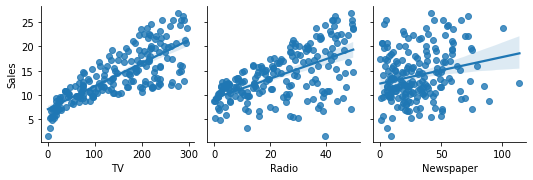

In [37]:
import seaborn as sns
sns.pairplot(df,x_vars=["TV","Radio","Newspaper"],y_vars= "Sales",kind="reg")

In [38]:
X = df[["TV","Radio","Newspaper"]]
y = df["Sales"]
X = np.array(X)
y = np.array(y)

In [39]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#（3）训练
lr = LinearRegression()
lr.fit(X_train, y_train)

#（4）预测(本例分必要)
y_pred_train = lr.predict(X_train) #在测试集合上预测
y_pred_test = lr.predict(X_test) #在测试集合上预测

#(5) 评估模型
print("训练集合上R^2 = {:.3f}".format(lr.score(X_train, y_train)))
print("测试集合上R^2 = {:.3f} ".format(lr.score(X_test, y_test)))

#r2_score
print("训练集合上R^2 = {:.3f}".format(r2_score(y_train, y_pred_train)))
print("测试集合上R^2 = {:.3f} ".format(r2_score(y_test,y_pred_test)))

print('w0 = {0:.3f}'.format(lr.intercept_))
print('W = {}'.format(lr.coef_)) 

训练集合上R^2 = 0.907
测试集合上R^2 = 0.860 
训练集合上R^2 = 0.907
测试集合上R^2 = 0.860 
w0 = 2.995
W = [ 0.04458402  0.19649703 -0.00278146]


In [40]:
b, w = olsm_matrix(X, y)
print(b, w)

[[2.93888937]] [[ 0.04576465]
 [ 0.18853002]
 [-0.00103749]]
